<a href="https://colab.research.google.com/github/HarshaNarula/Stock-Predictions/blob/main/HarshaNarula_Nityaa_Ragini_UAceIt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr 

In [ ]:
df = pdr.get_data_tiingo('TTM', api_key="d3dea2d4d2a8e9d2417779e309dd2df0a094754b" )
df.head(10)

In [ ]:
df.tail(10)

In [ ]:
df=df.reset_index()
df.head()

In [ ]:
df=df.drop(['date','symbol','adjClose','adjLow','adjHigh','adjOpen','adjVolume','divCash','splitFactor'], axis=1)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


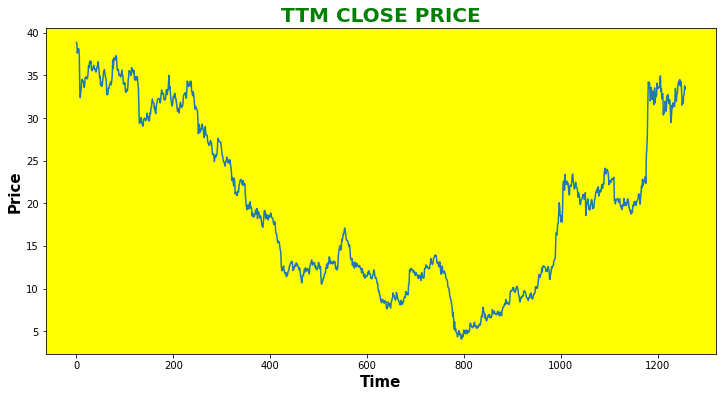

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.close)

plt.xlabel("Time",fontweight="bold",fontsize=15)
plt.ylabel("Price",fontweight="bold",fontsize=15)
plt.title("TTM CLOSE PRICE",fontweight="bold", color="green",fontsize=20)
ax=plt.axes()
ax.set_facecolor("yellow")

plt.show()

In [ ]:
#moving average 
ma100=df.close.rolling(100).mean()
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
1253    29.7839
1254    29.9089
1255    30.0390
1256    30.1784
1257    30.3103
Name: close, Length: 1258, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


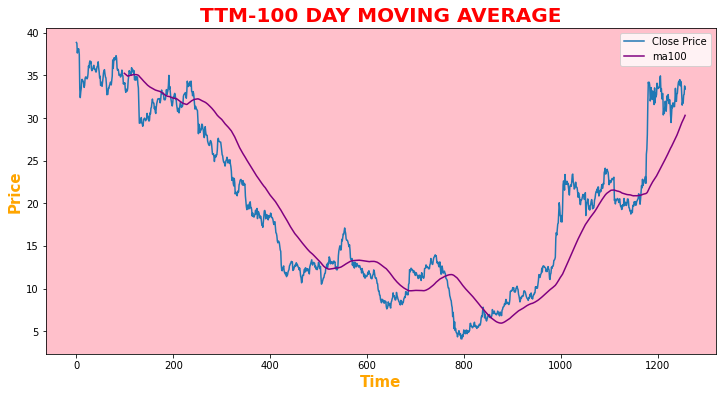

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.close,label='Close Price')
plt.plot(ma100,'purple',label='ma100')
plt.legend()

plt.xlabel("Time",fontweight="bold",color="orange",fontsize=15)
plt.ylabel("Price",fontweight="bold",color="orange",fontsize=15)
plt.title("TTM-100 DAY MOVING AVERAGE",fontweight="bold",color='r',fontsize=20)
#plt.legend(["df","ma100"], loc="upper right")
#plt.legend()

ax=plt.axes()
ax.set_facecolor("pink")
plt.show()


In [ ]:
df.shape

(1258, 5)

In [ ]:
#splitting the data 
training = pd.DataFrame(df['close'][0:int(len(df)*0.7)]) #we are taking 70% of our data for training 
testing = pd.DataFrame(df['close'][int(len(df)*0.7):int(len(df))])
print(training.shape)
print(testing.shape)

(880, 1)
(378, 1)


In [ ]:
training.tail()

,close
875,7.24
876,7.12
877,7.03
878,6.82
879,7.45


In [ ]:
testing.head()

,close
880,7.54
881,7.82
882,7.85
883,7.92
884,8.21


In [ ]:
#scale down the data between 0 and 1 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
#convert ti into array and preprocess it 
training_array = scaler.fit_transform(training)
print(training_array)

[[1.00000000e+00]
 [9.97412306e-01]
 [9.64347326e-01]
 [9.79010926e-01]
 [9.76423232e-01]
 [9.77860840e-01]
 [9.58596895e-01]
 [8.43300748e-01]
 [8.13973548e-01]
 [8.32949971e-01]
 [8.44738355e-01]
 [8.74640598e-01]
 [8.75503163e-01]
 [8.71477861e-01]
 [8.69465210e-01]
 [8.60264520e-01]
 [8.48476136e-01]
 [8.55664175e-01]
 [8.78665900e-01]
 [8.83553767e-01]
 [8.83553767e-01]
 [8.79240943e-01]
 [8.77228292e-01]
 [8.81253594e-01]
 [8.93617021e-01]
 [9.20931570e-01]
 [9.14318574e-01]
 [9.30994825e-01]
 [9.37895342e-01]
 [9.29269695e-01]
 [9.35595170e-01]
 [9.10868315e-01]
 [9.04830362e-01]
 [9.09430707e-01]
 [9.10293272e-01]
 [9.19206440e-01]
 [9.22944221e-01]
 [9.11155837e-01]
 [9.12018401e-01]
 [9.07705578e-01]
 [9.00805060e-01]
 [9.00517539e-01]
 [9.12593445e-01]
 [9.19493962e-01]
 [9.20356527e-01]
 [9.34732605e-01]
 [9.14606095e-01]
 [9.01380104e-01]
 [8.80966072e-01]
 [8.86141461e-01]
 [8.55089132e-01]
 [8.60264520e-01]
 [8.65727430e-01]
 [8.52213916e-01]
 [8.65439908e-01]
 [8.792409

In [ ]:
training_array.shape

(880, 1)

In [ ]:
x_train=[]
y_train=[]

for i in range(100,training_array.shape[0]):
  x_train.append(training_array[i-100:i])
  y_train.append(training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(780, 100, 1)

**ML** **MODEL**

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units=50,activation="relu", return_sequences=True, 
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation="relu",return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation="relu", return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation="relu"))
model.add(Dropout(0.5))

#this is output layer 
model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 12s 280ms/step - loss: 0.0647
Epoch 2/50
25/25 [==============================] - 7s 273ms/step - loss: 0.0121
Epoch 3/50
25/25 [==============================] - 7s 283ms/step - loss: 0.0095
Epoch 4/50
25/25 [==============================] - 9s 383ms/step - loss: 0.0115
Epoch 5/50
25/25 [==============================] - 8s 327ms/step - loss: 0.0094
Epoch 6/50
25/25 [==============================] - 7s 277ms/step - loss: 0.0106
Epoch 7/50
25/25 [==============================] - 7s 284ms/step - loss: 0.0071
Epoch 8/50
25/25 [==============================] - 7s 274ms/step - loss: 0.0075
Epoch 9/50
25/25 [==============================] - 7s 275ms/step - loss: 0.0076
Epoch 10/50
25/25 [==============================] - 7s 277ms/step - loss: 0.0070
Epoch 11/50
25/25 [==============================] - 7s 286ms/step - loss: 0.0073
Epoch 12/50
25/25 [==============================] - 7s 275ms/step - loss: 0.0078
Epoch 13/50
25/25 [=====

In [ ]:
model.save('keras_model.h5')

In [ ]:
testing.head()

,close
880,7.54
881,7.82
882,7.85
883,7.92
884,8.21


In [ ]:
training.tail(10)

,close
870,7.35
871,7.14
872,7.00
873,6.87
874,6.79
875,7.24
876,7.12
877,7.03
878,6.82
879,7.45


In [ ]:
past_100_days= training.tail(100)

In [ ]:
final_df = past_100_days.append(testing, ignore_index=True)

In [ ]:
final_df.tail()

,close
473,31.75
474,32.70
475,32.77
476,33.76
477,33.40


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[3.92093325e-02],
       [6.51328581e-02],
       [3.24044070e-02],
       [3.98574206e-02],
       [2.68956578e-02],
       [2.26830849e-02],
       [2.07388205e-02],
       [8.10110175e-03],
       [2.04147764e-02],
       [2.46273493e-02],
       [3.14322748e-02],
       [1.68502916e-02],
       [1.52300713e-02],
       [2.07388205e-02],
       [9.72132210e-04],
       [1.29617628e-03],
       [0.00000000e+00],
       [1.55541154e-02],
       [8.42514582e-03],
       [1.71743357e-02],
       [3.43486714e-02],
       [2.52754375e-02],
       [3.11082307e-02],
       [1.97666883e-02],
       [2.75437459e-02],
       [3.37005833e-02],
       [3.33765392e-02],
       [2.00907323e-02],
       [3.01360985e-02],
       [3.01360985e-02],
       [2.55994815e-02],
       [2.98120544e-02],
       [3.24044070e-02],
       [5.83279326e-02],
       [5.96241089e-02],
       [4.92546986e-02],
       [4.95787427e-02],
       [4.50421257e-02],
       [4.24497732e-02],
       [4.60142579e-02],


In [ ]:
input_data.shape

(478, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(378, 100, 1)
(378,)


In [ ]:
y_predicted = model.predict(x_test)

In [ ]:
y_predicted.shape

(378, 1)

In [ ]:
scaler.scale_

array([0.03240441])

In [ ]:
scale_factor=1/0.00052396
y_predicted= y_predicted* scale_factor
y_test = y_test * scale_factor

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


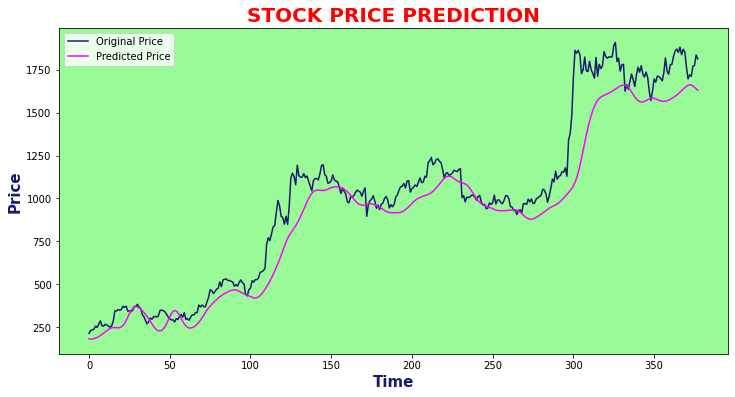

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(y_test,"midnightblue",label='Original Price')
plt.plot(y_predicted,"magenta",label='Predicted Price')
plt.legend()


plt.xlabel("Time",fontweight="bold",color="midnightblue",fontsize=15)
plt.ylabel("Price",fontweight="bold",color="midnightblue",fontsize=15)
plt.title("STOCK PRICE PREDICTION",fontweight="bold",color='r',fontsize=20)
#plt.legend(["df","ma100"], loc="upper right")
#plt.legend()

ax=plt.axes()
ax.set_facecolor("palegreen")
plt.show()

